# QUALITY PREDICTION OF RED WINE

# Agenda
- 1. [About the dataset](#dataset)
- 2. [Importing Relevant Packages](#import)
- 3. [Loading Dataset](#load)
- 4. [Data insights](#insight)
- 5. [Summary statistics](#statistics)
- 6. [Exploratory Data Analysis:](#EDA)
    - 6.1 [Distribution of data](#distribution) 
    - 6.2 [Presence of outliers](#outliers)
    - 6.3 [Data Visualization](#visualization)
    - 6.4 [Checking of missing values](#missing)
    - 6.5 [Correlation Analysis](#corr)
- 7. [Understanding Target variable](#target)
- 8. [Preprocessing data before for modeling:](#preprocessing)
    - 8.1 [Spliting the quality column into "good" and "bad"](#quality)
    - 8.2 [Standardizing & Splitting out training data and testing data](#std)
    - 8.3 [Handle imbalanced data using SMOTE](#smote)
- 9. [Learning Algorithm Selection:](#learning)
    - 9.1 [Logistic Regression Model](#lr)
    - 9.2 [Building Decision Tree Classifier Model](#dt)
    - 9.3 [Building Random Forest Classifier Model](#rf)
    - 9.4 [Building KNeighbors Classifier Model](#knn)
    - 9.5 [Building AdaBoost Classifier Model](#ada)
    - 9.6 [Building GradientBoosting Classifier Model](#gb)
    - 9.7 [Building SVM Classifier Model](#svm)
- 10. [Model Performance Assessment](#performance)
- 11. [Hyperparameter Tuning:](#hyper)
    - 11.1 [Grid Search Cross Validation](#cv)
    - 11.2 [Randomized Search Cross Validation](#rcv)
- 12. [Comparing all Learning Algorithem after Hyperparameter Tuning](#compare)
- 13. [Stacking Models:](#stacking)
    - 13.1 [Voting Classifier](#vc)
    - 13.2 [Mlxtend Classifier](#mlx)
    - 13.3 [Vecstack](#vec)
- 14. [Model Explanability by Eli5](#eli5)
- 15. [Summary](#summary)


# 1. About the dataset <a id='dataset'>

- The data is basically of Red wine and consists of attributes related to the red wine variant of the Portuguese "Vinho Verde" wine.
- In this problem, the goal is to model the quality of red wine based on its physical properties i.e to determine whether the wine is "good" or "bad". We'll use the "quality" field to determine "good" or "bad".
- The rest of the variables in the table will be inputs for our model.

# 2. Importing Relevant Packages <a id='import'>

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
from dataprep.eda import plot, plot_correlation, plot_missing
import plotly
import plotly.express as px

#preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix, classification_report  # for classification
from sklearn import metrics

#stacking
from vecstack import stacking
from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import StackingClassifier

NumExpr defaulting to 2 threads.


# Loading Dataset <a id='load'>

In [2]:
df= pd.read_csv('winequality-red.csv', sep=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



- Original data is seperated by delimiter " ; " in given dataset
- " .head() " returns first five observations of the dataset

# 4. Data insights <a id='insight'>

In [4]:
df.shape

(1599, 12)

- Dataset comprises of 1599 observations and 12 chracteriestics .

In [5]:
# Checking for duplicate values
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


#### As there are about 240 duplicate values, we will drop it.

In [6]:
df.drop_duplicates(inplace=True)
df.shape

(1359, 12)

#### After dropping duplicate rows the dataset comprises of 1359 observations and 12 chracteriestics .

In [7]:
df.columns 

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

- Label of each column

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


- Data has only float and integer values
- No variable column has null/missing values

# 5. Summary statistics <a id='statistics'>

In [49]:
df.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,0.135394
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.342270
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


#### Key Observations

- Mean value is more or less same as median value of each column except column "total sulfur dioxide".
- There is large differnce in 75th percentile and max values of predictors "residual sugar","free sulfur dioxide","total sulfur dioxide" which indicates the presence of outliers.
- There is huge variation in value of standard daviation of 'free sulfur dioxide and total sulfur dioxide compared to the rest columns which indicates the need of standardization of data.

# 6. Exploratory Data Analysis <a id='EDA'>

## 6.1 Distribution of data  <a id='distribution'>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0BDA8D30>,
      dtype=object)

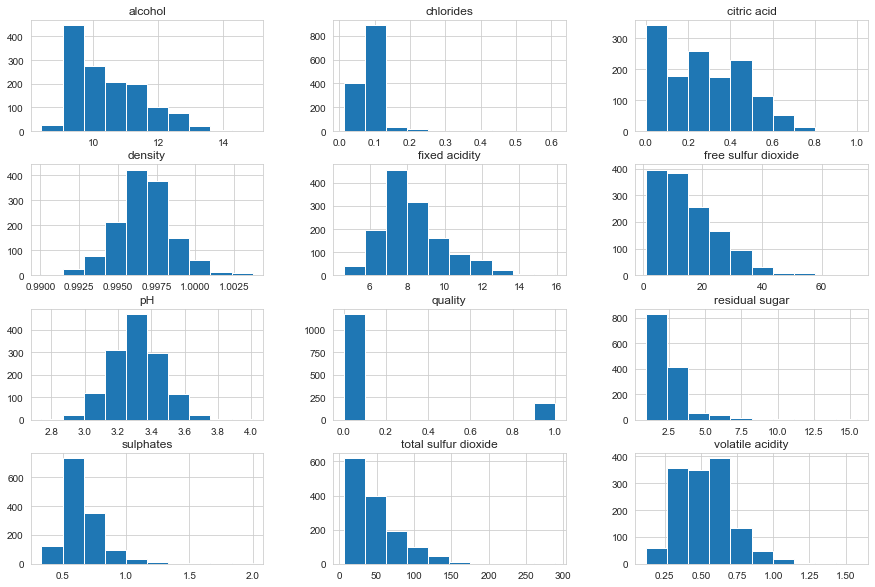

In [50]:
df.hist(figsize=(15,10))

- "pH" & "density" column appears to be normally distributed
- Remaining all independent variables are right skewed/positively skewed.

## 6.2  Presence of outliers <a id='outliers'>

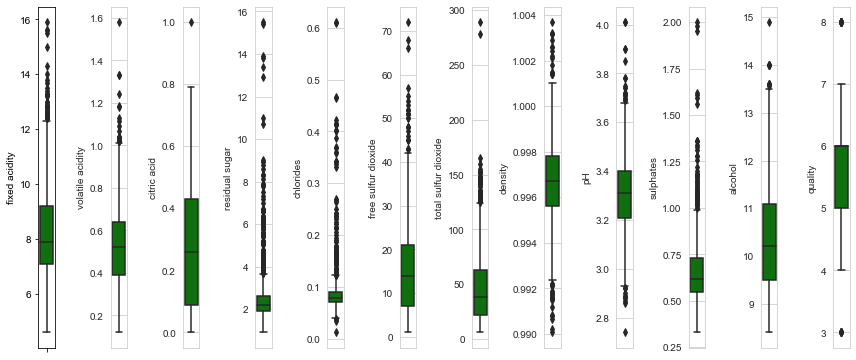

In [11]:
l = df.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

- Here alcohol and citric acid has less outliers as compared to all other columns.

## 6.3 Data Visualization <a id='visualization'>

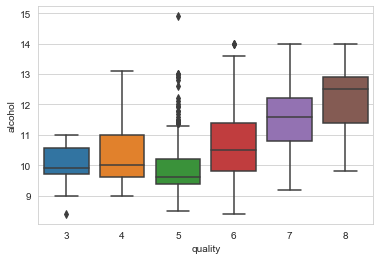

In [12]:
sns.boxplot(x='quality', y='alcohol',data=df)

- As alcohol content increases, quality of wine also increases.

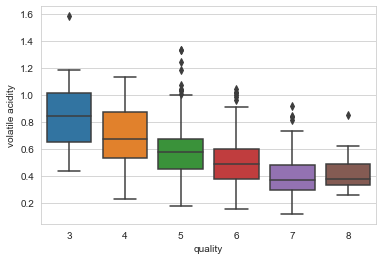

In [14]:
sns.boxplot(x='quality', y='volatile acidity',data=df)

- Volatile acidity is negatively correlated to quality.

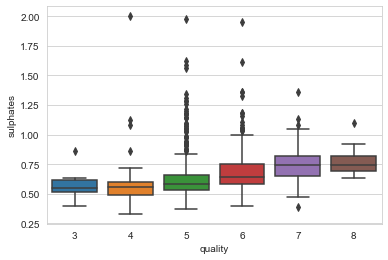

In [15]:
sns.boxplot(x='quality', y='sulphates',data=df)

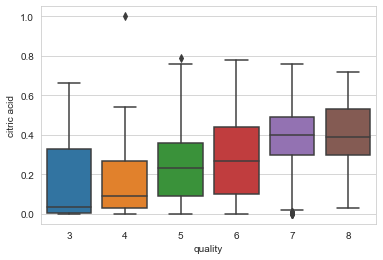

In [16]:
sns.boxplot(x='quality', y='citric acid',data=df)

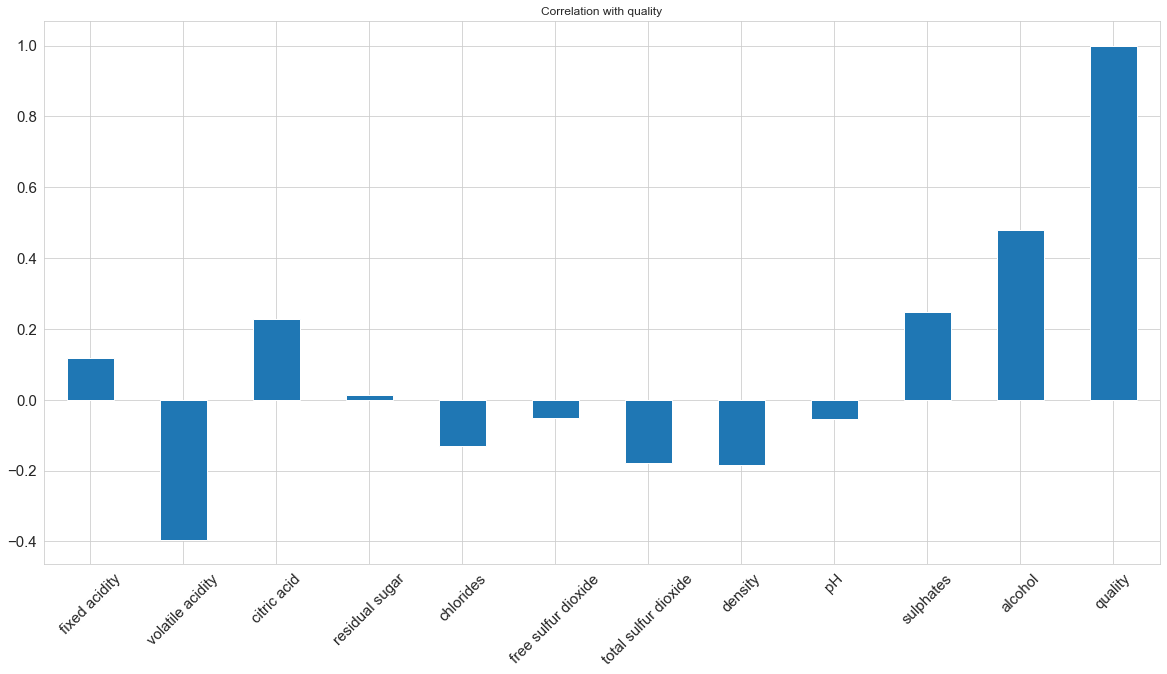

In [17]:
#Correlation with Quality with respect to attributes
df.corrwith(df.quality).plot.bar(
        figsize = (20, 10), title = "Correlation with quality", fontsize = 15,
        rot = 45, grid = True)

Here the bar plot is plotted for features against the taget variable "quality"
- "Alcohol", "volatile acidity","sulphates" and "citric acid" are most affecting features to the quality.

## 6.4 Checking of missing values <a id='missing'>

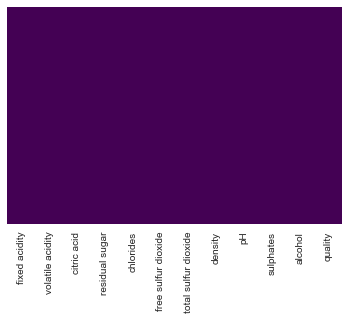

In [18]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

- Dataset has no missing values.

## 6.5 Correlation Analysis <a id='corr'>

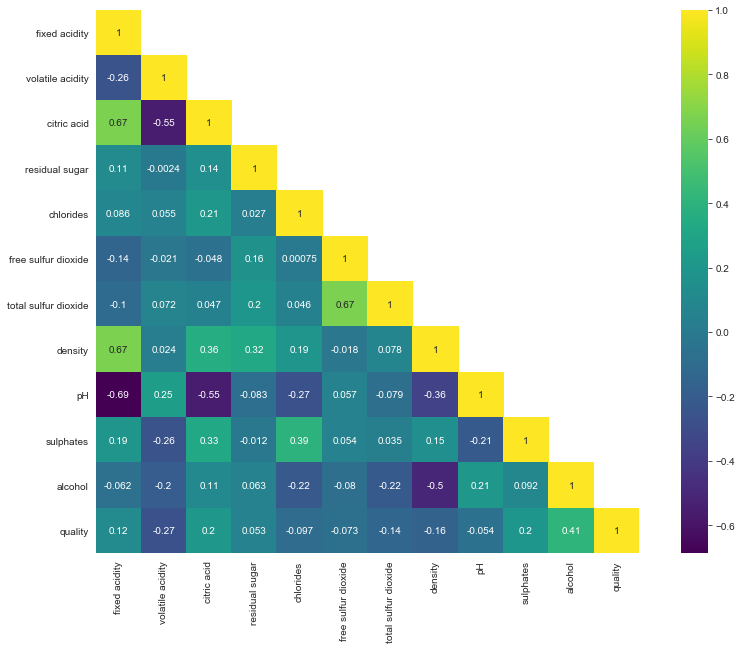

In [53]:
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(15,10)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True, cmap = 'viridis')

##  Inferences from the above heat map--

1. The quality of wine has negative correlation to volatile acidity.

2. Also the quality of wine is positively correlated to alcohol.

3. Free sulfur dioxide and pH values has very low correlation with  the taget variable quality.

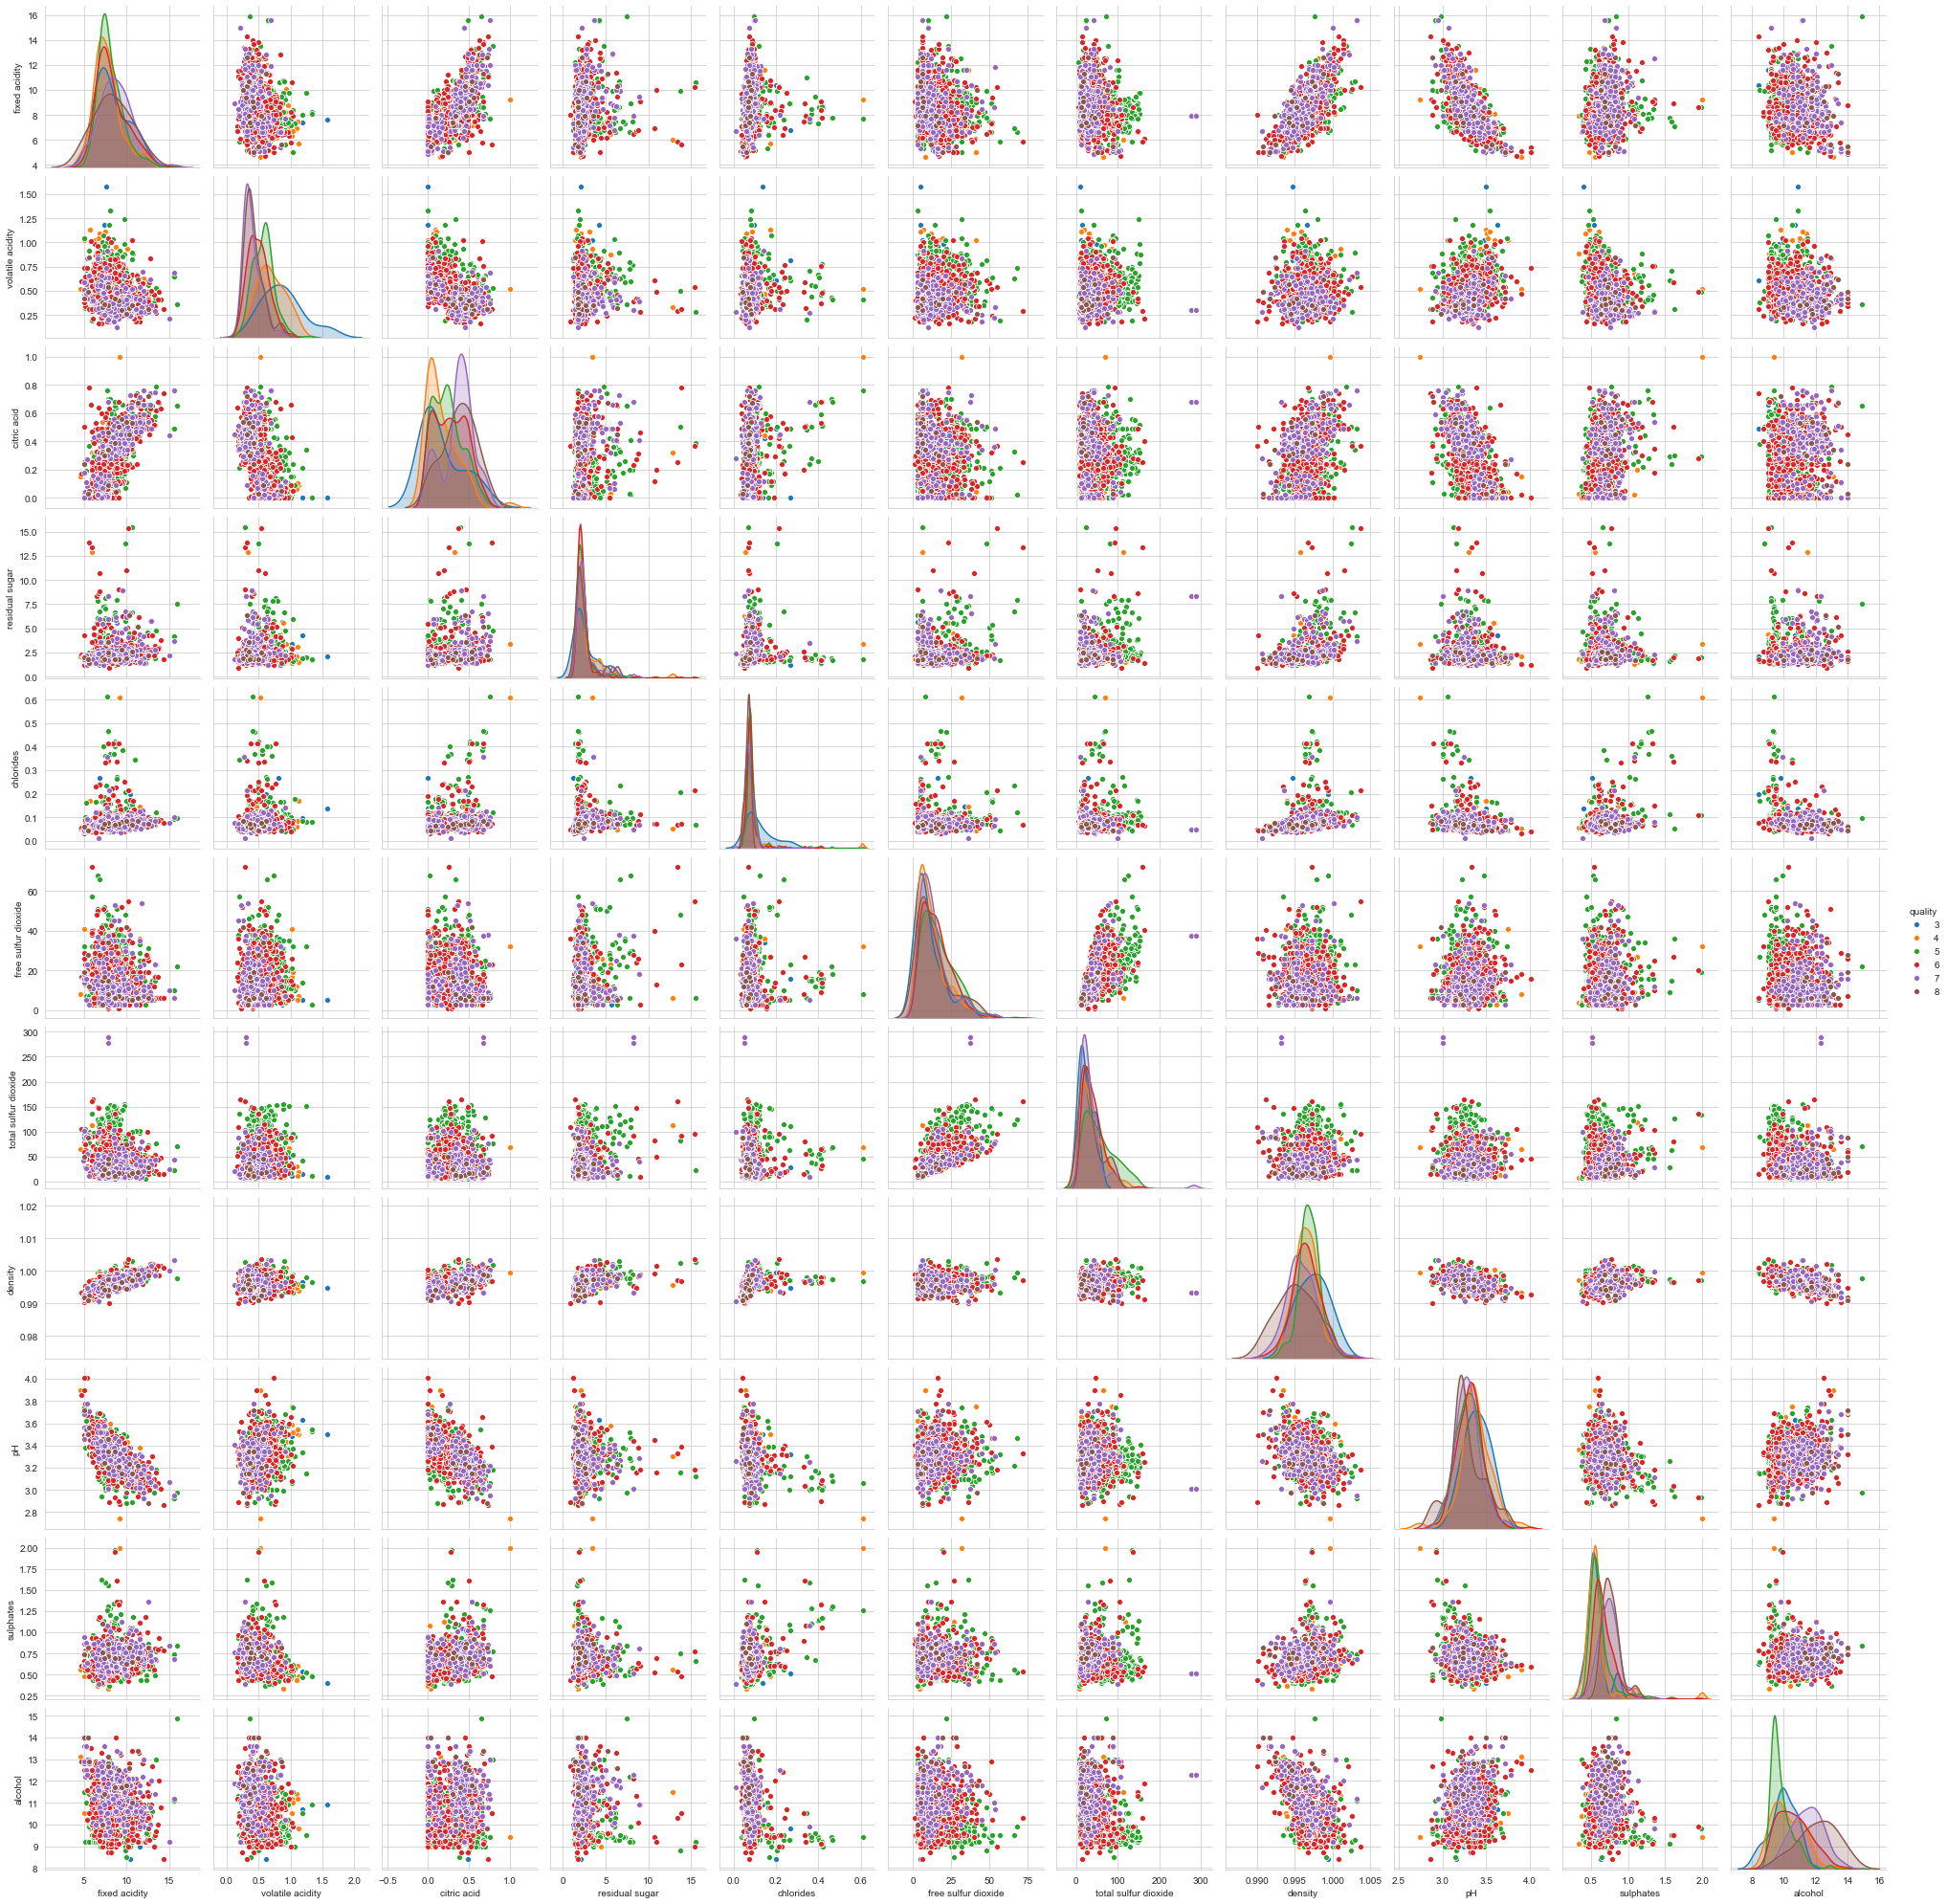

In [20]:
sns.pairplot(data=df, hue='quality')

# 7. Understanding Target variable <a id='target'>

In [21]:
df.quality.unique() 

array([5, 6, 7, 4, 8, 3], dtype=int64)

- Target variable/Dependent variable is discrete and categorical in nature.
- "quality" score scale ranges from 1 to 10;where 1 being poor and 10 being the best.
- 1, 2, 9 & 10 Quality ratings are not given by any obseravtion.Only scores obtained are between 3 to 8.

In [22]:
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

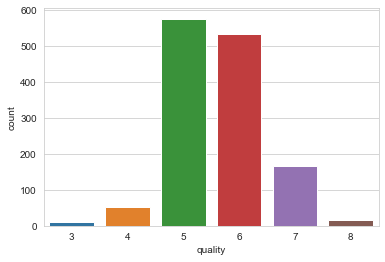

In [23]:
sns.countplot(df.quality)

- We can observe that score class 5 and 6 covers about 82 % of total class,  score class 7 covers about 12 % of scores in dataset.
- Score class 3, 4 and 8 combinely covers rest 6 % of scores

# 8. Preprocessing data before for modeling <a id='preprocessing'>

Now that we know our data is pretty clean, and we have a good idea of what our data looks like, we're going pre-processing the data before plugging these variables into the model.

What we need to do:

- Need to split the "quality" column into "good" and "bad", and assign numeric values for good and bad
- We need to split out training and testing data.

## 8.1 Spliting the quality column into "good" and "bad" <a id='quality'>

In [13]:
# splitting wine into good and bad groups, we're saying here that wines that have a quality score between
# 2-6.5 are "bad" quality, and wines that are  between 6.5 - 8 are "good"
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [14]:
# however "bad" and "good" aren't good naming conventions for a model to read in, so we're going to 
# assign a numeric label for this value. LabelEncoder() will help us do this!


# Assigning a label to our quality variable
label_quality = LabelEncoder()


# Now changing our dataframe to reflect our new label
df['quality'] = label_quality.fit_transform(df['quality'])

In [15]:
# printing the head to ensure the transformation happened
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [16]:
# Checking the count under class 0 & 1 after label encoding.
df['quality'].value_counts()

0    1175
1     184
Name: quality, dtype: int64

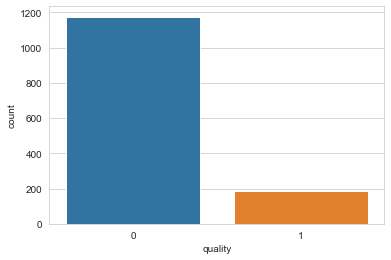

In [17]:
sns.countplot(df.quality)

- From the above count plot it is observed that the taget veriable classes are imbalanced. 

## 8.2  Standardizing & Splitting out training data and testing data <a id='std'>

In [18]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)
x=scaled_df[:,0:11]
y=df['quality']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.25,random_state=42)

In [20]:
print(x_train.shape)
print(x_test.shape)

(1019, 11)
(340, 11)


## 8.3 Handle imbalanced data using SMOTE <a id='smote'>

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
smote= SMOTE()
x_sm, y_sm= smote.fit_sample(x,y)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x_sm, y_sm,test_size=0.25,random_state=42)

In [24]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1762, 11)
(1762,)
(588, 11)
(588,)


In [25]:
print("After OverSampling, counts of label 'Bad': {}".format(sum(y_train==0)))
print("After OverSampling, counts of label 'Good': {}".format(sum(y_train==1)))

After OverSampling, counts of label 'Bad': 880
After OverSampling, counts of label 'Good': 882


# 9. Learning Algorithm Selection <a id='learning'>

## 9.1  Building Logistic Regression Model <a id='lr'>

In [37]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred= lr.predict(x_test)

In [38]:
#Coefficients for Logistic Regression
print(lr.coef_)
print(lr.intercept_)

[[ 0.94188277 -0.77760762 -0.39383737  0.34139545 -0.31923143  0.1602692
  -0.52478594 -0.58423474  0.13005849  0.72166245  0.98751004]]
[-1.14146682]


In [39]:
#Accuracy Score
lr_acc = metrics.accuracy_score(lr_pred,y_test)
lr_acc

0.8197278911564626

In [40]:
#Train Score
lr_train=lr.score(x_train,y_train)
lr_train

0.8172531214528944

In [41]:
#Test Score
lr_test=lr.score(x_test,y_test)
lr_test

0.8197278911564626

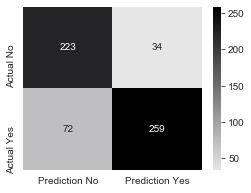

In [42]:
#Confusion Matrix
lr_conf=metrics.confusion_matrix(lr_pred,y_test)
plt.figure(figsize=(4,3))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(lr_conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,fmt='d')

In [43]:
#Classification Report
print(metrics.classification_report(lr_pred,y_test))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       257
           1       0.88      0.78      0.83       331

    accuracy                           0.82       588
   macro avg       0.82      0.83      0.82       588
weighted avg       0.83      0.82      0.82       588



In [44]:
#Null Accuracy
y_test.value_counts()
y_test.value_counts().head(1) / len(y_test)

0    0.501701
Name: quality, dtype: float64

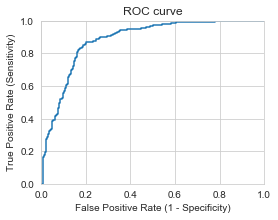

In [45]:
#ROC Curve
predict_probabilities = lr.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

plt.figure(figsize=(4,3))
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

## 9.2 Building Decision Tree Classifier Model <a id='dt'>

In [46]:
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)

In [47]:
#Accuracy Score
dt_acc = metrics.accuracy_score(dt_pred,y_test)
dt_acc

0.8690476190476191

In [48]:
#Train Score
dt_train=dt.score(x_train,y_train)
dt_train

1.0

In [49]:
#Test Score
dt_test=dt.score(x_test,y_test)
dt_test

0.8690476190476191

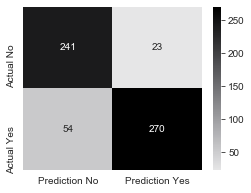

In [50]:
#Confusion Matrix
dt_conf=metrics.confusion_matrix(dt_pred,y_test)
plt.figure(figsize=(4,3))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(dt_conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,fmt='d')

In [51]:
#Classification Report
print(metrics.classification_report(dt_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       264
           1       0.92      0.83      0.88       324

    accuracy                           0.87       588
   macro avg       0.87      0.87      0.87       588
weighted avg       0.87      0.87      0.87       588



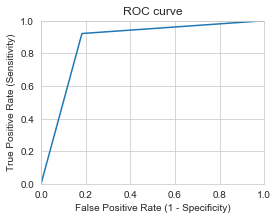

In [52]:
#ROC Curve
predict_probabilities = dt.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

plt.figure(figsize=(4,3))
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

## 9.3 Building Random Forest Classifier Model <a id='rf'>

In [36]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

In [37]:
#Accuracy Score
rf_acc = metrics.accuracy_score(rf_pred,y_test)
rf_acc

0.9285714285714286

In [38]:
#Train Score
rf_train=rf.score(x_train,y_train)
rf_train

1.0

In [39]:
#Test Score
rf_test=rf.score(x_test,y_test)
rf_test

0.9285714285714286

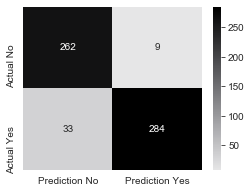

In [58]:
#Confusion Matrix
rf_conf=metrics.confusion_matrix(rf_pred,y_test)
plt.figure(figsize=(4,3))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(rf_conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,fmt='d')

In [59]:
#Classification Report
print(metrics.classification_report(rf_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       271
           1       0.97      0.90      0.93       317

    accuracy                           0.93       588
   macro avg       0.93      0.93      0.93       588
weighted avg       0.93      0.93      0.93       588



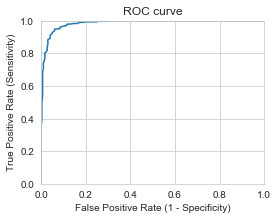

In [61]:
#ROC Curve
predict_probabilities = rf.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

plt.figure(figsize=(4,3))
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

## 9.4 Building KNeighbors Classifier Model <a id='knn'>

In [63]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

In [64]:
#Accuracy Score
knn_acc = metrics.accuracy_score(knn_pred,y_test)
knn_acc

0.8741496598639455

In [66]:
#Train Score
knn_train=knn.score(x_train,y_train)
knn_train

0.9001135073779796

In [67]:
#Test Score
knn_test=knn.score(x_test,y_test)
knn_test

0.8741496598639455

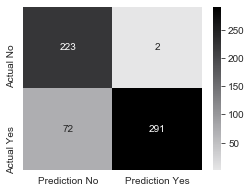

In [68]:
#Confusion Matrix
knn_conf=metrics.confusion_matrix(knn_pred,y_test)
plt.figure(figsize=(4,3))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(knn_conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,fmt='d')

In [69]:
#Classification Report
print(metrics.classification_report(knn_pred,y_test))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86       225
           1       0.99      0.80      0.89       363

    accuracy                           0.87       588
   macro avg       0.87      0.90      0.87       588
weighted avg       0.90      0.87      0.88       588



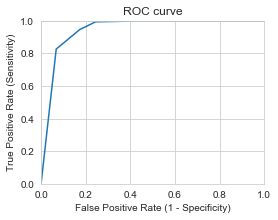

In [71]:
#ROC Curve
predict_probabilities = knn.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

plt.figure(figsize=(4,3))
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

## 9.5 Building AdaBoost Classifier Model <a id='ada'>

In [72]:
ab = AdaBoostClassifier()
ab.fit(x_train,y_train)
ab_pred = ab.predict(x_test)

In [73]:
#Accuracy Score
ab_acc = metrics.accuracy_score(ab_pred,y_test)
ab_acc

0.858843537414966

In [74]:
#Train Score
ab_train=ab.score(x_train,y_train)
ab_train

0.8887627695800226

In [75]:
#Test Score
ab_test=ab.score(x_test,y_test)
ab_test

0.858843537414966

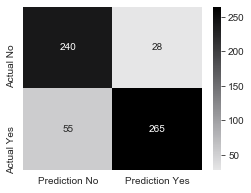

In [76]:
#Confusion Matrix
ab_conf=metrics.confusion_matrix(ab_pred,y_test)
plt.figure(figsize=(4,3))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(ab_conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,fmt='d')

In [77]:
#Classification Report
print(metrics.classification_report(ab_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       268
           1       0.90      0.83      0.86       320

    accuracy                           0.86       588
   macro avg       0.86      0.86      0.86       588
weighted avg       0.86      0.86      0.86       588



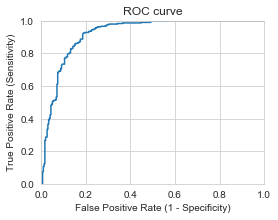

In [78]:
#ROC Curve
predict_probabilities = ab.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

plt.figure(figsize=(4,3))
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

## 9.6 Building GradientBoosting Classifier Model <a id='gb'>

In [79]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred = gb.predict(x_test)

In [80]:
#Accuracy Score
gb_acc = metrics.accuracy_score(gb_pred,y_test)
gb_acc

0.8826530612244898

In [81]:
#Train Score
gb_train=gb.score(x_train,y_train)
gb_train

0.94211123723042

In [82]:
#Test Score
gb_test=gb.score(x_test,y_test)
gb_test

0.8826530612244898

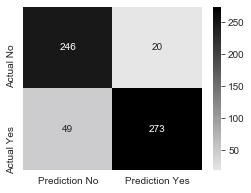

In [83]:
#Confusion Matrix
gb_conf=metrics.confusion_matrix(gb_pred,y_test)
plt.figure(figsize=(4,3))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(gb_conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,fmt='d')

In [84]:
#Classification Report
print(metrics.classification_report(gb_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88       266
           1       0.93      0.85      0.89       322

    accuracy                           0.88       588
   macro avg       0.88      0.89      0.88       588
weighted avg       0.89      0.88      0.88       588



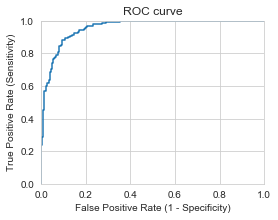

In [85]:
#ROC Curve
predict_probabilities = gb.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

plt.figure(figsize=(4,3))
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

## 9.7 Building SVM Classifier Model <a id='svm'>

In [89]:
svm = SVC()
svm.fit(x_train,y_train)
svm_pred= svm.predict(x_test)

In [90]:
#Accuracy Score
svm_acc = metrics.accuracy_score(svm_pred,y_test)
svm_acc

0.8503401360544217

In [91]:
#Train Score
svm_train=svm.score(x_train,y_train)
svm_train

0.8859250851305335

In [92]:
#Test Score
svm_test=svm.score(x_test,y_test)
svm_test

0.8503401360544217

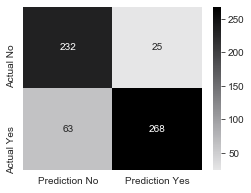

In [93]:
#Confusion Matrix
svm_conf=metrics.confusion_matrix(svm_pred,y_test)
plt.figure(figsize=(4,3))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(svm_conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,fmt='d')

In [94]:
#Classification Report
print(metrics.classification_report(svm_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       257
           1       0.91      0.81      0.86       331

    accuracy                           0.85       588
   macro avg       0.85      0.86      0.85       588
weighted avg       0.86      0.85      0.85       588



# 10. Model Performance Assessment <a id='performance'>

In [95]:
metrics = {'Metrics': ['Train Score','Test Score','Model Accuracy'],'Logistic Regression':[lr_train,lr_test,lr_acc],
          'Decision Tree Classifier':[dt_train,dt_test,dt_acc],'Random Forest Classifier':[rf_train,rf_test,rf_acc],
           'KNeighborsClassifier':[knn_train,knn_test,knn_acc],'AdaBoostClassifier':[ab_train,ab_test,ab_acc],
          'GradientBoostingClassifier':[gb_train,gb_test,gb_acc],'SVMClassifier':[svm_train,svm_test,svm_acc]}

In [96]:
metrics = pd.DataFrame(metrics)
metrics

,Metrics,Logistic Regression,Decision Tree Classifier,Random Forest Classifier,KNeighborsClassifier,AdaBoostClassifier,GradientBoostingClassifier,SVMClassifier
0,Train Score,0.817253,1.000000,1.000000,0.900114,0.888763,0.942111,0.885925
1,Test Score,0.819728,0.869048,0.928571,0.874150,0.858844,0.882653,0.850340
2,Model Accuracy,0.819728,0.869048,0.928571,0.874150,0.858844,0.882653,0.850340


- Here in performance assessment we can see that accuracy of Random Forest model is high as compares to other models

# 11.Hyperparameter Tuning <a id='hyper'>

## 11.1 Grid Search Cross Validation <a id='cv'>

### Decision Tree Classifier Model

In [97]:
dt_grid = {'max_features' : ['auto', 'sqrt'],
              'max_depth' : np.arange(1,20),
           'criterion':['gini','entropy'],
           "max_leaf_nodes": [20,30],
              'min_samples_split':[2,5,10],
              'min_samples_leaf':[1,2,4]}

dt = DecisionTreeClassifier()
dt_gs = GridSearchCV(dt, dt_grid, cv = 3, n_jobs=-1, verbose=2)
dt_gs.fit(x_train, y_train)
dt_gs_pred = dt_gs.predict(x_test)

Fitting 3 folds for each of 1368 candidates, totalling 4104 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 3796 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 4104 out of 4104 | elapsed:   37.5s finished


In [98]:
dt_gs.best_estimator_

DecisionTreeClassifier(max_depth=16, max_features='sqrt', max_leaf_nodes=30)

In [101]:
#Accuracy Score
dt_tune_gs_acc = metrics.accuracy_score(dt_gs_pred,y_test)
dt_tune_gs_acc

0.8231292517006803

In [103]:
#Train Score
dt_tune_gs_train=dt_gs.score(x_train,y_train)
dt_tune_gs_train

0.8740068104426788

In [104]:
#Test Score
dt_tune_gs_test=dt_gs.score(x_test,y_test)
dt_tune_gs_test

0.8231292517006803

### Random Forest Classifier Model

In [106]:
rf_grid = {'n_estimators': range(5,20,2),
              'max_features' : ['auto', 'sqrt'],
              'max_depth' : [10,20,30,40],
              'min_samples_split':[2,5,10],
              'min_samples_leaf':[1,2,4]}

rf = RandomForestClassifier()
rf_gs = GridSearchCV(rf, rf_grid, cv = 3, n_jobs=-1, verbose=2)

rf_gs.fit(x_train, y_train)
rf_gs_pred = rf_gs.predict(x_test)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 710 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 1276 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:  1.1min finished


In [107]:
rf_gs.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=19)

In [108]:
#Accuracy Score
rf_tune_gs_acc = metrics.accuracy_score(rf_gs_pred,y_test)
rf_tune_gs_acc

0.9268707482993197

In [109]:
#Train Score
rf_tune_gs_train=rf_gs.score(x_train,y_train)
rf_tune_gs_train

0.9982973893303064

In [110]:
#Test Score
rf_tune_gs_test=rf_gs.score(x_test,y_test)
rf_tune_gs_test

0.9268707482993197

### KNeighbors Classifier Model

In [112]:
knn_grid = {'leaf_size':np.arange(1,50),'n_neighbors':np.arange(1,30),'p':[1,2]}

knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, knn_grid, cv = 3, n_jobs=-1, verbose=2)

knn_gs.fit(x_train, y_train)
knn_gs_pred = knn_gs.predict(x_test)

Fitting 3 folds for each of 2842 candidates, totalling 8526 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2356 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 3570 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 4948 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 6486 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 8188 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 8526 out of 8526 | elapsed:  8.4min finished


In [113]:
knn_gs.best_estimator_

KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)

In [114]:
#Accuracy Score
knn_tune_gs_acc = metrics.accuracy_score(knn_gs_pred,y_test)
knn_tune_gs_acc

0.9251700680272109

In [115]:
#Train Score
knn_tune_gs_train=knn_gs.score(x_train,y_train)
knn_tune_gs_train

1.0

In [116]:
#Test Score
knn_tune_gs_test=knn_gs.score(x_test,y_test)
knn_tune_gs_test

0.9251700680272109

### AdaBoost Classifier Model

In [117]:
ab_grid = {"n_estimators": range(5,20,2) ,  
              "learning_rate": [0.01,0.05,0.1,0.5,1]}

ab = AdaBoostClassifier()
ab_gs = GridSearchCV(ab, ab_grid, cv = 3, n_jobs=-1, verbose=2)

ab_gs.fit(x_train, y_train)
ab_gs_pred = ab_gs.predict(x_test)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.7s finished


In [118]:
ab_gs.best_estimator_

AdaBoostClassifier(learning_rate=1, n_estimators=19)

In [119]:
#Accuracy Score
ab_tune_gs_acc = metrics.accuracy_score(ab_gs_pred,y_test)
ab_tune_gs_acc

0.8435374149659864

In [120]:
#Train Score
ab_tune_gs_train=ab_gs.score(x_train,y_train)
ab_tune_gs_train

0.8535754824063564

In [121]:
#Test Score
ab_tune_gs_test=ab_gs.score(x_test,y_test)
ab_tune_gs_test

0.8435374149659864

### Gradient Boosting Classifier Model

In [122]:
gb_grid = {"n_estimators": range(5,20,2) ,  
              "learning_rate": [0.01,0.05,0.1,0.5,1]}

gb = GradientBoostingClassifier()
gb_gs = GridSearchCV(gb, gb_grid, cv = 3, n_jobs=-1, verbose=2)

gb_gs.fit(x_train, y_train)
gb_gs_pred = gb_gs.predict(x_test)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.3s finished


In [123]:
gb_gs.best_estimator_

GradientBoostingClassifier(learning_rate=1, n_estimators=19)

In [124]:
#Accuracy Score
gb_tune_gs_acc = metrics.accuracy_score(gb_gs_pred,y_test)
gb_tune_gs_acc

0.8928571428571429

In [125]:
#Train Score
gb_tune_gs_train=gb_gs.score(x_train,y_train)
gb_tune_gs_train

0.9619750283768445

In [126]:
#Test Score
gb_tune_gs_test=gb_gs.score(x_test,y_test)
gb_tune_gs_test

0.8928571428571429

### SVM Classifier Model

In [127]:
svm_grid = {'kernel':['linear','rbf'],'decision_function_shape': ['ovr','ovr'],'class_weight':['balanced', None]}

svm = SVC()
svm_gs = GridSearchCV(svm, svm_grid, cv = 3, n_jobs=-1, verbose=2)

svm_gs.fit(x_train, y_train)
svm_gs_pred = svm_gs.predict(x_test)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.2s finished


In [128]:
svm_gs.best_estimator_

SVC()

In [129]:
svm_tune_gs_acc = metrics.accuracy_score(svm_gs_pred,y_test)
svm_tune_gs_acc

0.8503401360544217

In [131]:
#Train Score
svm_tune_gs_train=svm_gs.score(x_train,y_train)
svm_tune_gs_train

0.8859250851305335

In [132]:
#Test Score
svm_tune_gs_test=svm_gs.score(x_test,y_test)
svm_tune_gs_test

0.8503401360544217

## 11.2 Randomized Search Cross Validation <a id='rcv'>

### Decision Tree Classifier Model

In [137]:
#Finding optimal parameters using Randomized Search CV
params1 = {'max_depth': np.arange(1,20),'criterion':['gini','entropy'],"max_leaf_nodes": [20,30]}
dt = DecisionTreeClassifier()
tree = RandomizedSearchCV(dt, params1, cv=3 , return_train_score = True)
tree.fit(x,y)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_leaf_nodes': [20, 30]},
                   return_train_score=True)

In [138]:
tree.best_params_

{'max_leaf_nodes': 20, 'max_depth': 7, 'criterion': 'gini'}

In [139]:
dtr = DecisionTreeClassifier(criterion='gini',max_depth=12,max_leaf_nodes=30)
dtr.fit(x_train,y_train)
dtr_pred = dtr.predict(x_test)

In [140]:
#Accuracy Score
dt_tune_rs_acc = metrics.accuracy_score(dtr_pred,y_test)
dt_tune_rs_acc

0.8520408163265306

In [141]:
#Train Score
dt_tune_rs_train=dtr.score(x_train,y_train)
dt_tune_rs_train

0.8995459704880817

In [142]:
#Test Score
dt_tune_rs_test=dtr.score(x_test,y_test)
dt_tune_rs_test

0.8520408163265306

### Random Forest Classifier Model

In [143]:
#Finding optimal parameters using Randomized Search CV
params2 = {'n_estimators': np.arange(1,20),'criterion':['entropy','gini'],'max_leaf_nodes':[10,20,30],'max_depth':np.arange(1,20)}
rf = RandomForestClassifier()
forest = RandomizedSearchCV(rf, params2, cv=3 , return_train_score = True)
forest.fit(x,y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_leaf_nodes': [10, 20, 30],
                                        'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
                   return_train_score=True)

In [144]:
forest.best_params_

{'n_estimators': 12,
 'max_leaf_nodes': 20,
 'max_depth': 19,
 'criterion': 'entropy'}

In [146]:
rfr = RandomForestClassifier(criterion='gini',max_depth=8,n_estimators=4,max_leaf_nodes=30)
rfr.fit(x_train,y_train)
rfr_pred = rfr.predict(x_test)

In [147]:
#Accuracy Score
rf_tune_rs_acc = metrics.accuracy_score(rfr_pred,y_test)
rf_tune_rs_acc

0.8758503401360545

In [148]:
#Train Score
rf_tune_rs_train=rfr.score(x_train,y_train)
rf_tune_rs_train

0.9018161180476731

In [149]:
#Test Score
rf_tune_rs_test=rfr.score(x_test,y_test)
rf_tune_rs_test

0.8758503401360545

### KNeighbors Classifier Model

In [150]:
#Finding optimal parameters using Randomized Search CV
params3 = {'leaf_size':np.arange(1,50),'n_neighbors':np.arange(1,30),'p':[1,2]}
knn = KNeighborsClassifier()
neighbor = RandomizedSearchCV(knn, params3, cv=3 , return_train_score = True)
neighbor.fit(x,y)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(),
                   param_distributions={'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'p': [1, 2]},
                   return_train_score=True)

In [151]:
neighbor.best_params_

{'p': 1, 'n_neighbors': 24, 'leaf_size': 39}

In [152]:
knnr = KNeighborsClassifier(n_neighbors=28,leaf_size=28, p=2)
knnr.fit(x_train,y_train)
knnr_pred = knnr.predict(x_test)

In [153]:
#Accuracy Score
knn_tune_rs_acc = metrics.accuracy_score(knnr_pred,y_test)
knn_tune_rs_acc

0.8027210884353742

In [154]:
#Train Score
knn_tune_rs_train=knnr.score(x_train,y_train)
knn_tune_rs_train

0.8337116912599319

In [155]:
#Test Score
knn_tune_rs_test=knnr.score(x_test,y_test)
knn_tune_rs_test

0.8027210884353742

### AdaBoost Classifier Model

In [156]:
#Finding optimal parameters using Randomized Search CV
params4 = {"n_estimators": range(5,20,2) ,  
              "learning_rate": [0.01,0.05,0.1,0.5,1]}
ab = AdaBoostClassifier()
AB = RandomizedSearchCV(ab,param_distributions=params4,
                           cv = 5,
                           n_jobs=-1,
                           verbose=2)
AB.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.8s finished


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1],
                                        'n_estimators': range(5, 20, 2)},
                   verbose=2)

In [157]:
AB.best_params_

{'n_estimators': 11, 'learning_rate': 0.5}

In [159]:
abr = AdaBoostClassifier(n_estimators=15,learning_rate=1)
abr.fit(x_train,y_train)
abr_pred = abr.predict(x_test)

In [160]:
#Accuracy Score
ab_tune_rs_acc = metrics.accuracy_score(abr_pred,y_test)
ab_tune_rs_acc

0.8282312925170068

In [161]:
#Train Score
ab_tune_rs_train=abr.score(x_train,y_train)
ab_tune_rs_train

0.8416572077185017

In [162]:
#Test Score
ab_tune_rs_test=abr.score(x_test,y_test)
ab_tune_rs_test

0.8282312925170068

### Gradient Boosting Classifier Model

In [163]:
#Finding optimal parameters using Randomized Search CV
params5 = {"n_estimators": range(5,20,2) ,  
              "learning_rate": [0.01,0.05,0.1,0.5,1]}
gb = GradientBoostingClassifier()
GB = RandomizedSearchCV(gb,param_distributions=params5,
                           cv = 5,
                           n_jobs=-1,
                           verbose=2)
GB.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.7s finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1],
                                        'n_estimators': range(5, 20, 2)},
                   verbose=2)

In [164]:
GB.best_params_

{'n_estimators': 7, 'learning_rate': 0.05}

In [165]:
gbr = GradientBoostingClassifier(n_estimators=17,learning_rate=1)
gbr.fit(x_train,y_train)
gbr_pred = gbr.predict(x_test)

In [166]:
#Accuracy Score
gb_tune_rs_acc = metrics.accuracy_score(gbr_pred,y_test)
gb_tune_rs_acc

0.8945578231292517

In [167]:
#Train Score
gb_tune_rs_train=gbr.score(x_train,y_train)
gb_tune_rs_train

0.9557321225879682

In [168]:
#Test Score
gb_tune_rs_test=gbr.score(x_test,y_test)
gb_tune_rs_test

0.8945578231292517

### SVM Classifier Model

In [170]:
#Finding optimal parameters using Randomized Search CV
params8 = {'kernel':['linear','rbf'],'decision_function_shape': ['ovr','ovr'],'class_weight':['balanced', None]} 
svm = SVC()
SVM = RandomizedSearchCV(svm,param_distributions=params8,
                           cv = 5)
SVM.fit(x,y)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'class_weight': ['balanced', None],
                                        'decision_function_shape': ['ovr',
                                                                    'ovr'],
                                        'kernel': ['linear', 'rbf']})

In [171]:
SVM.best_params_

{'kernel': 'rbf', 'decision_function_shape': 'ovr', 'class_weight': None}

In [172]:
svmr = SVC(kernel ='rbf',decision_function_shape = 'ovr',class_weight=None)
svmr.fit(x_train,y_train)
svmr_pred = svmr.predict(x_test)

In [173]:
#Accuracy Score
svm_tune_rs_acc = metrics.accuracy_score(svmr_pred,y_test)
svm_tune_rs_acc

0.8503401360544217

In [174]:
#Train Score
svm_tune_rs_train=svmr.score(x_train,y_train)
svm_tune_rs_train

0.8859250851305335

In [175]:
#Test Score
svm_tune_rs_test=svmr.score(x_test,y_test)
svm_tune_rs_test

0.8503401360544217

# 12. Comparing all Learning Algorithem after Hyperparameter Tuning <a id='compare'>

In [176]:
#Creating dictionary for all the metrics and models
metrics = {'Metrics': ['Train Score','Train Score after GridSearchCV','Train Score after RandomizedSearchCV','Test Score','Test Score after GridSearchCV','Test Score after RandomizedSearchCV','Model Accuracy','Model Accuracy after GridSearchCV','Model Accuracy after RandomizedSearchCV'],'Logistic Regression':[lr_train,'NA','NA',lr_test,'NA','NA',lr_acc,'NA','NA'],
          'Decision Tree Classifier':[dt_train,dt_tune_gs_train,dt_tune_rs_train,dt_test,dt_tune_gs_test,dt_tune_rs_test,dt_acc,dt_tune_gs_acc,dt_tune_rs_acc],'Ramdom Forest Classifier':[rf_train,rf_tune_gs_train,rf_tune_rs_train,rf_test,rf_tune_gs_test,rf_tune_rs_test,rf_acc,rf_tune_gs_acc,rf_tune_rs_acc],'KNearestNeighbor Classifier':[knn_train,knn_tune_gs_train,knn_tune_rs_train,knn_test,knn_tune_gs_test,knn_tune_rs_test,knn_acc,knn_tune_gs_acc,knn_tune_rs_acc],'Ada Boost Classifier':[ab_train,ab_tune_gs_train,ab_tune_rs_train,ab_test,ab_tune_gs_test,ab_tune_rs_test,ab_acc,ab_tune_gs_acc,ab_tune_rs_acc],'Gradient Boosting Classifier':[gb_train,gb_tune_gs_train,gb_tune_rs_train,gb_test,gb_tune_gs_test,gb_tune_rs_test,gb_acc,gb_tune_gs_acc,gb_tune_rs_acc],
          'Support Vector Classifier':[svm_train,svm_tune_gs_train,svm_tune_rs_train,svm_test,svm_tune_gs_test,svm_tune_rs_test,svm_acc,svm_tune_gs_acc,svm_tune_rs_acc]}

In [177]:
#Converting dictionary to dataframe
metrics = pd.DataFrame(metrics)
metrics

,Metrics,Logistic Regression,Decision Tree Classifier,Ramdom Forest Classifier,KNearestNeighbor Classifier,Ada Boost Classifier,Gradient Boosting Classifier,Support Vector Classifier
0,Train Score,0.817253,1.000000,1.000000,0.900114,0.888763,0.942111,0.885925
1,Train Score after GridSearchCV,NA,0.874007,0.998297,1.000000,0.853575,0.961975,0.885925
2,Train Score after RandomizedSearchCV,NA,0.899546,0.901816,0.833712,0.841657,0.955732,0.885925
3,Test Score,0.819728,0.869048,0.928571,0.874150,0.858844,0.882653,0.850340
4,Test Score after GridSearchCV,NA,0.823129,0.926871,0.925170,0.843537,0.892857,0.850340
5,Test Score after RandomizedSearchCV,NA,0.852041,0.875850,0.802721,0.828231,0.894558,0.850340
6,Model Accuracy,0.819728,0.869048,0.928571,0.874150,0.858844,0.882653,0.850340
7,Model Accuracy after GridSearchCV,NA,0.823129,0.926871,0.925170,0.843537,0.892857,0.850340
8,Model Accuracy after RandomizedSearchCV,NA,0.852041,0.875850,0.802721,0.828231,0.894558,0.850340


- Comparing the model accuracy after hyper parameter tunning we got Random Forest and KNN with high accuracy after Grid Search CV and  Gradient boost classifier having high accuracy after Randomised search CV.

# 13. Stacking Models <a id='stacking'>

## 13.1  Voting Classifier <a id='vc'>

In [178]:
#Assigning estimator models for voting classifier
vote_est = [('rf_gs',rf_gs),('knn_gs',knn_gs),('gbr',gbr)]

In [179]:
vote = VotingClassifier(estimators=vote_est,voting='soft')
vote.fit(x_train,y_train)
vote_pred = vote.predict(x_test)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 534 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 1346 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 2842 candidates, totalling 8526 fits


[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 718 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1284 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2014 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2904 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 3958 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 5172 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 6550 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 8088 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 8523 out of 8526 | elapsed:  8.8min remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 8526 out of 8526 | elapsed:  8.8min finished


In [182]:
#Accuracy Score
vote_acc = metrics.accuracy_score(vote_pred,y_test)
vote_acc

0.9421768707482994

In [183]:
#Train Score
vote_train=vote.score(x_train,y_train)
vote_train

1.0

In [184]:
#Test Score
vote_test=vote.score(x_test,y_test)
vote_test

0.9421768707482994

## 13.2 Mlxtend Classifier <a id='mlx'>

In [187]:
#Fitting and training the model
st = StackingClassifier(classifiers=[rf_gs,knn_gs,gbr],meta_classifier=lr)
st.fit(x_train,y_train)
st_pred = st.predict(x_test)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 1334 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:  1.6min finished


Fitting 3 folds for each of 2842 candidates, totalling 8526 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 4897 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 6602 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 8526 out of 8526 | elapsed: 12.1min finished


In [188]:
#Accuracy Score
st_acc = metrics.accuracy_score(st_pred,y_test)
st_acc

0.9319727891156463

In [189]:
#Train Score
st_train=st.score(x_train,y_train)
st_train

0.9994324631101021

In [190]:
#Test Score
st_test=st.score(x_test,y_test)
st_test

0.9319727891156463

In [191]:
#Creating dictionary for all the metrics and converting it to dataframe
metrics_stack = {'Models': ['Voting Classifier','Stacking Classifier'],'Train score':[vote_train,st_train],'Test Score':[vote_test,st_test],'Model Accuracy':[vote_acc,st_acc]}
metrics_stack = pd.DataFrame(metrics_stack)
metrics_stack

,Models,Train score,Test Score,Model Accuracy
0,Voting Classifier,1.000000,0.942177,0.942177
1,Stacking Classifier,0.999432,0.931973,0.931973


### The best model being Voting Classifier.

## 13.3 Vecstack <a id='vec'>

In [195]:
#1st level model
models = [rf,knn,gbr]
S_train, S_test = stacking(models, x_train, y_train, x_test, 
    regression = False, metric = metrics.accuracy_score, n_folds = 4 , 
    shuffle = True, random_state = 0, verbose = 2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestClassifier]
    fold  0:  [0.90022676]
    fold  1:  [0.89795918]
    fold  2:  [0.91818182]
    fold  3:  [0.92727273]
    ----
    MEAN:     [0.91091012] + [0.01227267]
    FULL:     [0.91089671]

model  1:     [KNeighborsClassifier]
    fold  0:  [0.85487528]
    fold  1:  [0.85260771]
    fold  2:  [0.85227273]
    fold  3:  [0.87500000]
    ----
    MEAN:     [0.85868893] + [0.00947027]
    FULL:     [0.85868331]

model  2:     [GradientBoostingClassifier]
    fold  0:  [0.86167800]
    fold  1:  [0.87528345]
    fold  2:  [0.89318182]
    fold  3:  [0.85909091]
    ----
    MEAN:     [0.87230854] + [0.01353013]
    FULL:     [0.87230420]



In [197]:
#2nd level model
models = [dt,gb,ab]
S_train, S_test = stacking(models, x_train, y_train, x_test, 
    regression = False, metric = metrics.accuracy_score, n_folds = 4 , 
    shuffle = True, random_state = 0, verbose = 2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [DecisionTreeClassifier]
    fold  0:  [0.86394558]
    fold  1:  [0.85260771]
    fold  2:  [0.88636364]
    fold  3:  [0.86818182]
    ----
    MEAN:     [0.86777469] + [0.01214922]
    FULL:     [0.86776390]

model  1:     [GradientBoostingClassifier]
    fold  0:  [0.87755102]
    fold  1:  [0.88208617]
    fold  2:  [0.88863636]
    fold  3:  [0.89090909]
    ----
    MEAN:     [0.88479566] + [0.00529035]
    FULL:     [0.88479001]

model  2:     [AdaBoostClassifier]
    fold  0:  [0.84126984]
    fold  1:  [0.86167800]
    fold  2:  [0.87500000]
    fold  3:  [0.87500000]
    ----
    MEAN:     [0.86323696] + [0.01379966]
    FULL:     [0.86322361]



### From the above analysis,the best model is being Voting Classifier

# 14. Model Explanability by Eli5 <a id='eli5'>

In [42]:
import eli5
from eli5.sklearn import PermutationImportance

In [45]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [46]:
features=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [47]:
perm = PermutationImportance(rf, random_state=1).fit(x_test,rf_pred)
eli5.show_weights(perm, feature_names = features)

Weight,Feature
0.1925 ± 0.0245,alcohol
0.1595 ± 0.0336,sulphates
0.1439 ± 0.0207,volatile acidity
0.0670 ± 0.0259,total sulfur dioxide
0.0422 ± 0.0132,citric acid
0.0354 ± 0.0200,pH
0.0320 ± 0.0084,density
0.0303 ± 0.0079,free sulfur dioxide
0.0276 ± 0.0066,chlorides
0.0235 ± 0.0100,residual sugar


- Here we can see the importance of each variable corresponding to their weightage.

# 15. Summary <a id='summary'>

- On this red-wine quality dataset, we have performed EDA and checked different variables affecting target variable through visualisation.
- We have divided the quality rating into two parts as good and bad considering 6.5 as threshold value.
- We have used SMOTE to balance the output class.
- We have performed different classification algorithms with and without hyperparameter tunning and got the Random Forest as best algorithm with accuracy score of __92.85__.
- Also we have performed staking models like voting classifier and MLxtend classifier and found voting classifier as best model with test score of **94.21**.
- We performed Eli5 on Random Forest model to see the weightage of each variable in dataset.